#                    MODEL EVALUATION METRICS


DEF:
   * evaluating a model is core part of building an effective machine learning model
   * there are several evaluation metrics like confusion matrix and cross validation AUC-ROC CURVE etc.,
   * different evaluation metrics are used for different kinds of problems.
   
# INTRODUCTION:
   * the idea of building ML  models works on a constructive feed back principle.you build a model get feed back from metrics make improvements and continue untill u achieve a desirable accuracy.
   * evaluation metrics  explains the performance of a model.
   * an imp aspects of evaluation model is their capabiity to discriminate among model results.
   
   
   
 #
   * i have seen plenty of analyst and data scientist not even bothering to check how robust their model is.
   * once they finished bulding a model the hurriedly map predicted values on unseen data.
   * this is an incorrect approach.
   
   
   
#
   * simply building a predictive model it's not ur motive.
   * it's about craeting and  selecting a model which gives high accuracy on out of sample data.
   * hence it is crucial to check the accuracy of ur model prior to computing predicted values.
   
   
   
   
   
# 
   * in our industry we consider diff kinds of metrics to evaluate our models.
   * the choice of metric is completely depends on the type of model and implementation plan of the model.
  
  
#
   * after ur finished  buldinig ur model these 11 metrics helps u in evaluating ur model accuracy 
   * considering the rising popolaruty and imp of cross validation 
   
   
# TABLE OF CONTENTS:


1. CONFUSION MATRIX
2. F1 SCORE
3. GAIN AND LIFT CHARTS
4. KOLMOGOROV SMIRNOV CHART
5. AUC-ROC 
6. LOG LOSS
7. GINI COEFFICIENT
8. CONCORDANT-DISCORDANT RATIO 
9. ROOT MEAN SQUARED ERROR
10. CROSS VALIDATION

# CONFUSION MATRIX:
DEF:

   * A CONFUSION MATRIX IS AN N*N matrix,where N is the no of classes being predicted.
   * for the problem in hand we have N=2 and hence we got a 2*2 matrix 
   * here we have a few definitions u need to remember for confusion matrix
   
# 1.ACCURACY:
   * it is the ratio of the total no of correct predictions/total no of predictions made by dataset
   * it is a good matrix when data is well balanced 
# formula:
               *  TP+TN/TP+FP+FN+TN
   
# 2.RECALL OR SENSITIVY:

   * it is the ratio of true positive to all positives in your data set
# lower recall:
  * the more false negative the model predicts the lower the recall
  # FORMULA
                      *   TP/TP+FN
  
# PRECISION:
  *  it is the ratio of true positive to all the positives predicted by the model
 
 
# low precision:

  * the more of false positives then model prdicts the lower the precision
  
  
  # FORMULA:
                         *    TP/TP+FP
                         
                         
                         
                         
# F1_SCORE:
     *  we are trying to predict the best precision and best recall  at the same time f1 score is the haronic mean of precision and recall values for a classification problem 
     
# formula:
                   *   2%1/recall+1/precision
                   
                   
# ROC: it stands for  RECIEVER OPERATING CHARACTERISTICS



          * FOR PRESENTING THE PERFORMANCE OF A CLASSIFICATION MODEL 
          
   * TPR=true positive rate :          tpr=TP/TP+FN
   * FPR=false positive rate :          fpr=FP/FP+TN

In [1]:
# HANDS_ON

import os
import math
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
fb=pd.read_excel(r"E:\ds course\data sets\prac data sets\Fiberbits_v1.xlsx")

In [3]:
fb.shape

(100000, 9)

In [4]:
fb.head(2)

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,85,4,1,0,121,4,85
1,0,1581,85,4,1,0,133,4,85


In [6]:
fb.keys()

Index(['active_cust', 'income', 'months_on_network', 'Num_complaints',
       'number_plan_changes', 'relocated', 'monthly_bill',
       'technical_issues_per_month', 'Speed_test_result'],
      dtype='object')

In [7]:
fb.active_cust.value_counts()

1    57859
0    42141
Name: active_cust, dtype: int64

In [8]:
fb.active_cust.value_counts()/len(fb)*100

1    57.859
0    42.141
Name: active_cust, dtype: float64

In [11]:
# in genral cases:


# from the dataset we are taking the attribute or variable called active _cust
"""   dependent variable also called as target variable
      * it's also called event rate
      
      
      * event rate:
                    it is the ratio of no of 1's in data/total no of records count
                    
        * rate is >20% data is well balanced data.
        * rate is <20% data is imbalanced data
        
        * over sampling
        * under sampling
        * smote"""


print(" the above is the entropy its just note ")

 the above is the entropy its just note 


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train,test=train_test_split(fb,test_size=0.2,random_state=0)

In [15]:
print(train.shape,test.shape)

(80000, 9) (20000, 9)


In [16]:
x_train=train.drop(["active_cust"],axis=1)

In [17]:
y_train=train["active_cust"]

In [19]:
x_test=test.drop(["active_cust"],axis=1)

In [20]:
y_test=test["active_cust"]

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
dtc.fit(x_train,y_train)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [25]:
dtc.score(x_train,y_train)

0.99735

In [26]:
dtc.score(x_test,y_test)



# it is over fitting

0.84835

# diff b/w training accuracy and test accuracy is more than 10% its called over fitting if it is less than 10% its called under fitting

# hyper parameter tuning:
   
   
   * IN ML HYPER PARAMETER OPTIMIZATION OR TUNING IS THE PROBLEM OF CHOOSING A SET OF OPTIMAL PARAMETRS FOR A LEARNING ALGORITHM A HYPERPARAMETR IS A PARAMETER WHOSE VALUE IS USED TO CONTROL THE LEARNING PROCESS 
   
   
   * IT CONTROLS THE OVER ALL BEHAVIOUR OF A ML MODEL 
   * THE ULTIMATE GOAL IS TO FIND AN OPTIMAL COMBINATION OF HYPER PARAMETERS THAT MINIMIZES A PRE DEFINED LOSS FUNCTION TO GIVE BETTER RESULTS
   

In [28]:
# here we are performing hyper parameter tuning to get best accuracy

for i in range(1,20):
    dtc1=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    dtc1.fit(x_train,y_train)
    print("score at each iteration ",i,"values are ",dtc1.score(x_test,y_test))

score at each iteration  1 values are  0.68165
score at each iteration  2 values are  0.68165
score at each iteration  3 values are  0.7554
score at each iteration  4 values are  0.7706
score at each iteration  5 values are  0.84105
score at each iteration  6 values are  0.84605
score at each iteration  7 values are  0.853
score at each iteration  8 values are  0.86065
score at each iteration  9 values are  0.8677
score at each iteration  10 values are  0.8789
score at each iteration  11 values are  0.8807
score at each iteration  12 values are  0.8814
score at each iteration  13 values are  0.88475
score at each iteration  14 values are  0.88475
score at each iteration  15 values are  0.8802
score at each iteration  16 values are  0.88085
score at each iteration  17 values are  0.8765
score at each iteration  18 values are  0.87555
score at each iteration  19 values are  0.87145


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=13)
dtc.fit(x_train,y_train)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 13,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [31]:
dtc.score(x_train,y_train)

0.903075

In [33]:
dtc.score(x_test,y_test)

0.88475

# here the diff b/w training accuracy and test accuracy less than 10% so its a under fitting

In [36]:
#    GRID SEARCH NOTHING BUT CALLED AS THE CROSS VALIDATION


from sklearn.model_selection import GridSearchCV

In [46]:
params={"max_depth":np.arange(1,20),"min_samples_split":np.arange(1,4)}
model1=GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42),param_grid=params)
model1.fit(x_train,y_train)

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\harid\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\harid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': array([1, 2, 3])})

In [48]:
model1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

In [49]:
model1.best_params_

{'max_depth': 12, 'min_samples_split': 2}

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=13)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=42)

In [51]:
dtc.predict(x_train)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [52]:
train["predict"]=dtc.predict(x_train)

<ipython-input-52-05174f5d23d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["predict"]=dtc.predict(x_train)


In [53]:
train.head()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,predict
10382,1,1770,59,4,1,0,126,4,80,1
73171,1,1680,69,4,2,0,46,4,85,1
30938,1,1757,61,4,1,0,135,4,80,1
99310,1,1571,87,4,1,0,168,4,86,1
58959,0,1889,49,4,0,0,76,4,75,0


In [54]:
pd.crosstab(train["active_cust"],train["predict"])

predict,0,1
active_cust,,
0,29172,4474
1,3280,43074


In [55]:
pd.crosstab(train["predict"],train["active_cust"])

active_cust,0,1
predict,,
0,29172,3280
1,4474,43074


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(train["active_cust"],train["predict"])

array([[29172,  4474],
       [ 3280, 43074]], dtype=int64)

# four metrics:

# true positive: observative is a positive and predicted to be positive

# false negative:observation is positive and it is predicted as negative


# false positive: actualy observation is negative but our model predicted as positive

# true negative : observation is negative and our model predicted as neagtive 


* it is called confusion matrix


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(train["active_cust"],train["predict"])

0.903075

In [60]:
test["predict"]=dtc.predict(x_test)

<ipython-input-60-6f532f752526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predict"]=dtc.predict(x_test)


In [61]:
test.head()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,predict
3582,1,1597,83,4,1,0,51,4,86,1
60498,0,2176,32,4,3,0,76,4,78,0
53227,1,1616,79,4,1,0,162,4,86,1
21333,0,1901,47,4,2,0,174,4,77,0
3885,1,1616,78,4,1,0,90,4,86,1


In [62]:
accuracy_score(test["active_cust"],test["predict"])

0.88475

In [63]:
pd.crosstab(train["predict"],train["active_cust"])

active_cust,0,1
predict,,
0,29172,3280
1,4474,43074


In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [65]:
accuracy_score(train["predict"],train["active_cust"])

0.903075

In [66]:
precision_score(train["predict"],train["active_cust"])

0.9292401950209259

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(train["active_cust"],train["predict"])

array([[29172,  4474],
       [ 3280, 43074]], dtype=int64)

In [70]:
recall_score(train["predict"],train["active_cust"])

0.9059056111718684

In [71]:
from sklearn.metrics import *

In [76]:
dir(metrics)

['ConfusionMatrixDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_average_precision_score',
 'label_rank

In [77]:
f1_score(train["predict"],train["active_cust"])

0.9174245489978915

# ROC CURVE: RECIEVER OPERATING CHARACTERISTICS CURVE

In [78]:
roc_auc_score(train["predict"],train["active_cust"])

0.9024166290790934

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve

In [80]:
from sklearn.metrics import auc

In [81]:
import matplotlib.pyplot as plt

In [82]:
preds=train["predict"]

In [83]:
fpr,tpr,threshod=roc_curve(train["active_cust"],preds)

Text(0, 0.5, 'tpr')

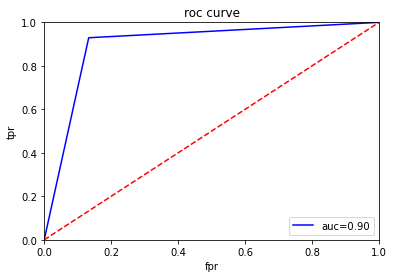

In [87]:
roc_auc=auc(fpr,tpr)
plt.title("roc curve")
plt.plot(fpr,tpr,"b",label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("fpr")
plt.ylabel("tpr")

# here we have seen confusion matrix ,hyper parameter tuning grid search,fpr,tpr,roc curce,accuracy,precision,recall,f1_score

In [ ]:
#                    MODEL EVALUATION METRICS


DEF:
   * evaluating a model is core part of building an effective machine learning model
   * there are several evaluation metrics like confusion matrix and cross validation AUC-ROC CURVE etc.,
   * different evaluation metrics are used for different kinds of problems.
   
# INTRODUCTION:
   * the idea of building ML  models works on a constructive feed back principle.you build a model get feed back from metrics make improvements and continue untill u achieve a desirable accuracy.
   * evaluation metrics  explains the performance of a model.
   * an imp aspects of evaluation model is their capabiity to discriminate among model results.
   
   
   
 #
   * i have seen plenty of analyst and data scientist not even bothering to check how robust their model is.
   * once they finished bulding a model the hurriedly map predicted values on unseen data.
   * this is an incorrect approach.
   
   
   
#
   * simply building a predictive model it's not ur motive.
   * it's about craeting and  selecting a model which gives high accuracy on out of sample data.
   * hence it is crucial to check the accuracy of ur model prior to computing predicted values.
   
   
   
   
   
# 
   * in our industry we consider diff kinds of metrics to evaluate our models.
   * the choice of metric is completely depends on the type of model and implementation plan of the model.
  
  
#
   * after ur finished  buldinig ur model these 11 metrics helps u in evaluating ur model accuracy 
   * considering the rising popolaruty and imp of cross validation 
   
   
# TABLE OF CONTENTS:


1. CONFUSION MATRIX
2. F1 SCORE
3. GAIN AND LIFT CHARTS
4. KOLMOGOROV SMIRNOV CHART
5. AUC-ROC 
6. LOG LOSS
7. GINI COEFFICIENT
8. CONCORDANT-DISCORDANT RATIO 
9. ROOT MEAN SQUARED ERROR
10. CROSS VALIDATION

# CONFUSION MATRIX:
DEF:

   * A CONFUSION MATRIX IS AN N*N matrix,where N is the no of classes being predicted.
   * for the problem in hand we have N=2 and hence we got a 2*2 matrix 
   * here we have a few definitions u need to remember for confusion matrix
   
# 1.ACCURACY:
   * it is the ratio of the total no of correct predictions/total no of predictions made by dataset
   * it is a good matrix when data is well balanced 
# formula:
               *  TP+TN/TP+FP+FN+TN
   
# 2.RECALL OR SENSITIVY:

   * it is the ratio of true positive to all positives in your data set
# lower recall:
  * the more false negative the model predicts the lower the recall
  # FORMULA
                      *   TP/TP+FN
  
# PRECISION:
  *  it is the ratio of true positive to all the positives predicted by the model
 
 
# low precision:

  * the more of false positives then model prdicts the lower the precision
  
  
  # FORMULA:
                         *    TP/TP+FP
                         
                         
                         
                         
# F1_SCORE:
     *  we are trying to predict the best precision and best recall  at the same time f1 score is the haronic mean of precision and recall values for a classification problem 
     
# formula:
                   *   2%1/recall+1/precision
                   
                   
# ROC: it stands for  RECIEVER OPERATING CHARACTERISTICS



          * FOR PRESENTING THE PERFORMANCE OF A CLASSIFICATION MODEL 
          
   * TPR=true positive rate :          tpr=TP/TP+FN
   * FPR=false positive rate :          fpr=FP/FP+TN

# HANDS_ON

import os
import math
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


fb=pd.read_excel(r"E:\ds course\data sets\prac data sets\Fiberbits_v1.xlsx")

fb.shape

fb.head(2)

fb.keys()

fb.active_cust.value_counts()

fb.active_cust.value_counts()/len(fb)*100

# in genral cases:


# from the dataset we are taking the attribute or variable called active _cust
"""   dependent variable also called as target variable
      * it's also called event rate
      
      
      * event rate:
                    it is the ratio of no of 1's in data/total no of records count
                    
        * rate is >20% data is well balanced data.
        * rate is <20% data is imbalanced data
        
        * over sampling
        * under sampling
        * smote"""


print(" the above is the entropy its just note ")

from sklearn.model_selection import train_test_split

train,test=train_test_split(fb,test_size=0.2,random_state=0)

print(train.shape,test.shape)

x_train=train.drop(["active_cust"],axis=1)

y_train=train["active_cust"]

x_test=test.drop(["active_cust"],axis=1)

y_test=test["active_cust"]

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
dtc.fit(x_train,y_train)
dtc.get_params()

dtc.score(x_train,y_train)

dtc.score(x_test,y_test)



# it is over fitting

# diff b/w training accuracy and test accuracy is more than 10% its called over fitting if it is less than 10% its called under fitting

# hyper parameter tuning:
   
   
   * IN ML HYPER PARAMETER OPTIMIZATION OR TUNING IS THE PROBLEM OF CHOOSING A SET OF OPTIMAL PARAMETRS FOR A LEARNING ALGORITHM A HYPERPARAMETR IS A PARAMETER WHOSE VALUE IS USED TO CONTROL THE LEARNING PROCESS 
   
   
   * IT CONTROLS THE OVER ALL BEHAVIOUR OF A ML MODEL 
   * THE ULTIMATE GOAL IS TO FIND AN OPTIMAL COMBINATION OF HYPER PARAMETERS THAT MINIMIZES A PRE DEFINED LOSS FUNCTION TO GIVE BETTER RESULTS
   

# here we are performing hyper parameter tuning to get best accuracy

for i in range(1,20):
    dtc1=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=i)
    dtc1.fit(x_train,y_train)
    print("score at each iteration ",i,"values are ",dtc1.score(x_test,y_test))

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=13)
dtc.fit(x_train,y_train)
dtc.get_params()

dtc.score(x_train,y_train)

dtc.score(x_test,y_test)

# here the diff b/w training accuracy and test accuracy less than 10% so its a under fitting

#    GRID SEARCH NOTHING BUT CALLED AS THE CROSS VALIDATION


from sklearn.model_selection import GridSearchCV

params={"max_depth":np.arange(1,20),"min_samples_split":np.arange(1,4)}
model1=GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42),param_grid=params)
model1.fit(x_train,y_train)

model1.best_estimator_

model1.best_params_

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=13)
dtc.fit(x_train,y_train)

dtc.predict(x_train)

train["predict"]=dtc.predict(x_train)

train.head()

pd.crosstab(train["active_cust"],train["predict"])

pd.crosstab(train["predict"],train["active_cust"])

from sklearn.metrics import confusion_matrix

confusion_matrix(train["active_cust"],train["predict"])

# four metrics:

# true positive: observative is a positive and predicted to be positive

# false negative:observation is positive and it is predicted as negative


# false positive: actualy observation is negative but our model predicted as positive

# true negative : observation is negative and our model predicted as neagtive 


* it is called confusion matrix


from sklearn.metrics import accuracy_score

accuracy_score(train["active_cust"],train["predict"])

test["predict"]=dtc.predict(x_test)

test.head()

accuracy_score(test["active_cust"],test["predict"])

pd.crosstab(train["predict"],train["active_cust"])

from sklearn.metrics import accuracy_score,precision_score,recall_score

accuracy_score(train["predict"],train["active_cust"])

precision_score(train["predict"],train["active_cust"])

from sklearn.metrics import confusion_matrix

confusion_matrix(train["active_cust"],train["predict"])

recall_score(train["predict"],train["active_cust"])

from sklearn.metrics import *

dir(metrics)

f1_score(train["predict"],train["active_cust"])

# ROC CURVE: RECIEVER OPERATING CHARACTERISTICS CURVE

roc_auc_score(train["predict"],train["active_cust"])

from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.metrics import auc

import matplotlib.pyplot as plt

preds=train["predict"]

fpr,tpr,threshod=roc_curve(train["active_cust"],preds)

roc_auc=auc(fpr,tpr)
plt.title("roc curve")
plt.plot(fpr,tpr,"b",label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("fpr")
plt.ylabel("tpr")

# here we have seen confusion matrix ,hyper parameter tuning grid search,fpr,tpr,roc curce,accuracy,precision,recall,f1_score

